<a href="https://colab.research.google.com/github/AgampreetKaur/stockpriceprediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start ='2012-01-01'
end= '2022-12-21'
stock = 'GOOG'
data= yf.download(stock,start,end)


/tmp/ipython-input-3148557660.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
1,2012-01-04,16.531483,16.580216,16.341995,16.451087,114989399
2,2012-01-05,16.302164,16.424861,16.233394,16.379345,131808205
3,2012-01-06,16.079781,16.326659,16.074090,16.305631,108119746
4,2012-01-09,15.398017,16.005073,15.367589,15.992702,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.662201,96.559223,93.301517,94.890641,26452900
2757,2022-12-15,90.580139,93.390906,89.815376,92.904239,28298800
2758,2022-12-16,90.242439,91.126389,89.398218,90.580125,48485500


In [4]:
ma_100_days= data.Close.rolling(100).mean()


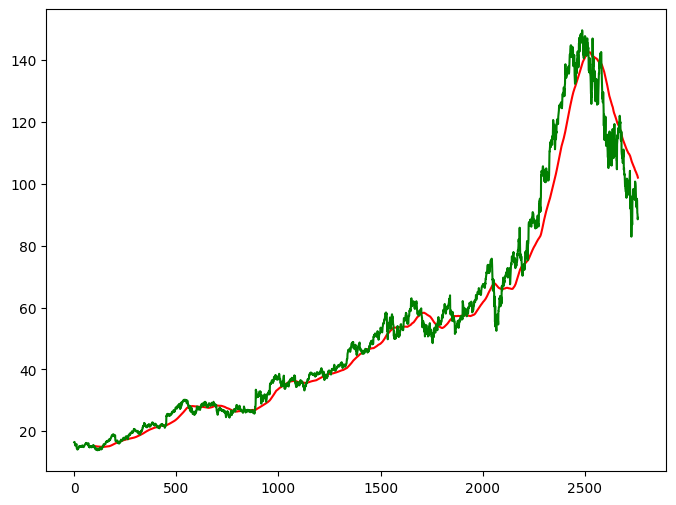

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [6]:
ma_200_days=data.Close.rolling(200).mean()

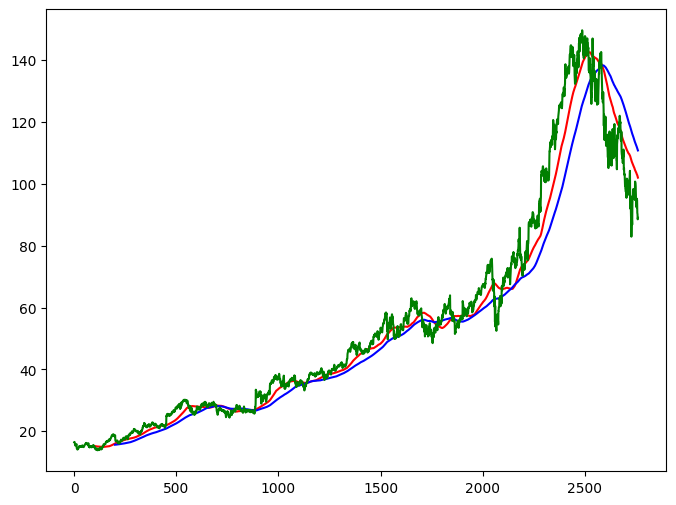

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [10]:
data_train.shape[0], data_test.shape[0]

(2208, 553)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale= scaler.fit_transform(data_train)

In [13]:
x=[]
y=[]
for  i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [14]:
x,y= np.array(x),np.array(y)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x,y, epochs=50, batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - loss: 0.0026
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - loss: 0.0022
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - loss: 0.0023
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 0.0025
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - loss: 0.0023
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - loss: 0.0024
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - loss: 0.0020
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - loss: 0.0020
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - loss: 0.0020
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - loss: 0.0022
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 0.0018
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - loss: 0.0023
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - loss: 0.0021
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - loss: 0.0021
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)


In [21]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [22]:
data_test_scale= scaler.fit_transform(data_test)

In [23]:
 x=[]
 y=[]
 for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y= np.array(x),np.array(y)

In [24]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


In [25]:
scale=1/scaler.scale_

In [26]:
y_predict=y_predict*scale

In [27]:
y=y*scale

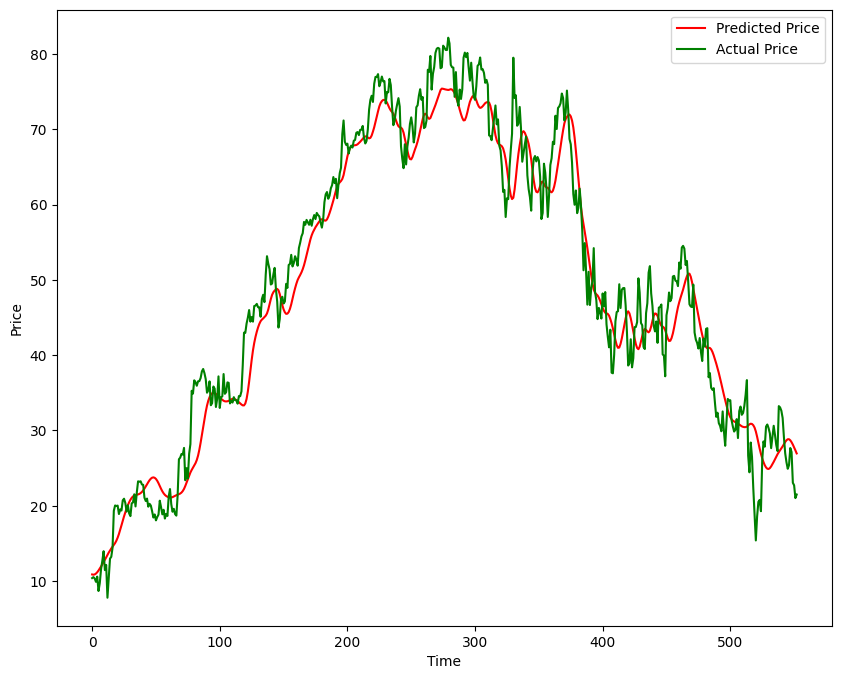

In [28]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [30]:
model.save('stock_price_prediction.keras')